Python 不能像 Java 那样使用 private 修饰符创建私有属性，但是 Python 有个简单的机制，能避免子类意外覆盖“私有”属性。 举个例子。有人编写了一个名为 Dog 的类，这个类的内部用到了 mood 实例属性，但是没有将其开放。现在，你创建了 Dog 类的子 类：Beagle。如果你在毫不知情的情况下又创建了名为 mood 的实例属 性，那么在继承的方法中就会把 Dog 类的 mood 属性覆盖掉。这是个难 以调试的问题。 为了避免这种情况，如果以 __mood 的形式（两个前导下划线，尾部没 有或最多有一个下划线）命名实例属性，Python 会把属性名存入实例的 __dict__ 属性中，而且会在前面加上一个下划线和类名。因此，对 Dog 类来说，__mood 会变成 _Dog__mood；对 Beagle 类来说，会变成 _Beagle__mood。这个语言特性叫名称改写（name mangling）。

In [1]:
class MySeq():
    def __getitem__(self, index):
        return index

In [2]:
s = MySeq()

In [4]:
s[1]

1

In [5]:
s[1:4]

slice(1, 4, None)

In [6]:
s[1:4:2]

slice(1, 4, 2)

In [7]:
s[1:4:2, 9]

(slice(1, 4, 2), 9)

In [8]:
s[1:4:2, 9:23]

(slice(1, 4, 2), slice(9, 23, None))

In [9]:
dir(slice)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'indices',
 'start',
 'step',
 'stop']

In [10]:
help(slice.indices)

Help on method_descriptor:

indices(...)
    S.indices(len) -> (start, stop, stride)
    
    Assuming a sequence of length len, calculate the start and stop
    indices, and the stride length of the extended slice described by
    S. Out of bounds indices are clipped in a manner consistent with the
    handling of normal slices.



在 Vector2d 中，我们使用 @property 装饰器把 x 和 y 标记为只读特 性（见示例 9-7）。我们可以在 Vector 中编写四个特性，但这样太麻 烦。特殊方法 __getattr__ 提供了更好的方式。 属性查找失败后，解释器会调用 __getattr__ 方法。简单来说，对 my_obj.x 表达式，Python 会检查 my_obj 实例有没有名为 x 的属性； 如果没有，到类（my_obj.__class__）中查找；如果还没有，顺着继 承树继续查找。4 如果依旧找不到，调用 my_obj 所属类中定义的 __getattr__ 方法，传入 self 和属性名称的字符串形式（如 'x'）。

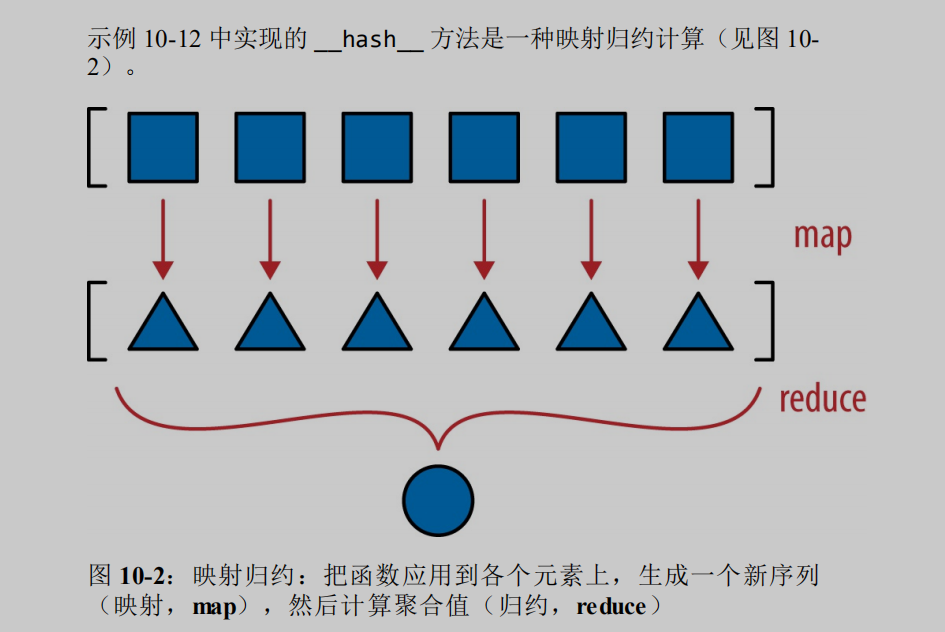

在 Python 2 中使用 map 函数效率低些，因为 map 函数要使用 结果构建一个列表。但是在 Python 3 中，map 函数是惰性的，它会 创建一个生成器，按需产出结果，因此能节省内存——这与示例 10-12 中使用生成器表达式定义 __hash__ 方法的原理一样。